In [51]:
import pandas as pd

list = []
df = pd.read_csv('FMEL_Dataset.csv')
colums = df.columns
#print(colums)
localGoals = df.localGoals
visitorGoals = df.visitorGoals
concat_goals = pd.concat([localGoals, visitorGoals], axis=1,join_axes=[localGoals.index])
#print(concat_goals)
concat_goals= concat_goals.values
print(len(concat_goals),concat_goals[0][1])

37147 1


In [52]:
import numpy as np
#左のチームの主観
def distinct(goals):
    match_result = []
    win = 2
    lose = 0
    draw = 1
    #print(goals)
    for a in goals:
        result = a[0] - a[1]
        if result > 0:
            match_result.append(win)
        elif result == 0:
            match_result.append(draw)
        elif result < 0:
            match_result.append(lose)
    return match_result

match_result = distinct(concat_goals)
#リストか配列か
#print(len(distinct(concat_goals)),np.array(match_result))
#

In [53]:
#チーム名のembetting
from sklearn.feature_extraction.text import CountVectorizer
local_team = df.localTeam.values
visiter_team = df.localTeam.values
count = CountVectorizer()
bag_local = count.fit_transform(local_team)
bag_visiter = count.fit_transform(visiter_team)

embetting_name_local = bag_local.toarray()
embetting_name_visiter = bag_visiter.toarray()
#embetting_name= embetting_name.tolist()
print(len(embetting_name_local[0]))

121


In [54]:
#正規化に問題ありそう
list = __builtins__.list
def zscore(x):
    xmean = x.mean()
    xstd = np.std(x)
    zscore = (x-xmean)/xstd
    return zscore

#min_maxがダメな気が
def min_max(x):
    min = x.min()
    max = x.max()
    result = (x-min)/(max-min)
    return result

def normalize(v, axis=-1, order=2):
    l2 = np.linalg.norm(v, ord = order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2

In [55]:
df_round = df['round'].values
print(df_round[100])
timestamp = df['timestamp'].values
print(timestamp[0])
division = df['division'].values
print(division[0])

13
21938400
1


In [56]:
df_season = df.season.values.tolist()
head = [a[:2] for a in df_season]
#print(head[0])
season = [a.split('-') for a in df_season]
#print(season[0][1])

for i in range(len(season)):
    season[i][1] = head[i] + season[i][1]

for i in range(len(season)):
    season[i] = [int(d) for d in season[i]]
season = np.array(season)
print(season[1])

[1970 1971]


In [57]:
#date
df_date = df['date'].values

#df_date = list(map(lambda d : d.split('/'),df_date))
#df_date = [d.strip('0') for d in df_date]
df_date = [d.split('/') for d in df_date]

for i in range(len(df_date)):
    df_date[i] = [int(d) for d in df_date[i]]
df_date = np.array(df_date)
print(df_date.shape)
print(df_date[0])

(37147, 3)
[  12    9 1970]


In [58]:
df_date = pd.to_datetime(df['date'])
print(df_date[0])
dayofweek = df_date.dt.dayofweek
dayofweek = dayofweek.astype(np.float32)
dayofweek = np.array(dayofweek)
#dayofweek = dayofweek.tolist()
dayofweek = normalize(dayofweek)
dayofweek = dayofweek.reshape(-1, 1)
print(dayofweek)
#print(dayofweek[0][0],dayofweek.shape,dayofweek.dtype)

1970-12-09 00:00:00
[[0.00211121]
 [0.00211121]
 [0.00211121]
 ...
 [0.00105561]
 [0.00105561]
 [0.00105561]]


In [59]:
new_df = np.zeros((37147,247))

for i in range(len(df_date)):
    new_df[i] =  np.hstack((
        season[i],
        division[i],
        df_round[i],
        embetting_name_local[i],
        embetting_name_visiter[i],
        dayofweek[i]
        
    ))
    
print(new_df[0])
print(type(new_df))

[1.97000000e+03 1.97100000e+03 1.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [60]:
first_half = normalize(new_df[:,0])
first_half = first_half.reshape(-1,1)
second_half = normalize(new_df[:,1])
second_half = second_half.reshape(-1,1)
new_df = np.delete(new_df,0,1)
new_df = np.delete(new_df,0,1)


In [61]:
full_year = np.hstack((first_half,second_half))
print(full_year.shape)

new_df = np.hstack((full_year,new_df))
print(new_df[100])

(37147, 2)
[5.12413808e-03 5.12986634e-03 1.00000000e+00 1.30000000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+

In [62]:
new_df = new_df.astype(np.float32)
print(new_df)

[[5.1241382e-03 5.1298663e-03 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.1112121e-03]
 [5.1241382e-03 5.1298663e-03 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.1112121e-03]
 [5.1241382e-03 5.1298663e-03 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.1112121e-03]
 ...
 [5.2463892e-03 5.2521918e-03 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0556061e-03]
 [5.2463892e-03 5.2521918e-03 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0556061e-03]
 [5.2463892e-03 5.2521918e-03 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0556061e-03]]


In [63]:
#試合結果
match_result = np.array(match_result)
print(match_result.shape)

(37147,)


In [64]:
datasets = []
for i,j in zip(new_df,match_result):
    datasets.append((i,j))
print(datasets[0])

(array([0.00512414, 0.00512987, 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

In [65]:
#ここからモデル作り
train_number = int(len(datasets) * 0.6)
print(train_number)
train_and_valid = int(len(datasets) * 0.8)
test_number = int(len(datasets) * 0.2)
train_valid_datasets = datasets[0:train_and_valid]
train = train_valid_datasets[0:train_number]
validation = train_valid_datasets[train_number+1:len(train_valid_datasets)]
test = datasets[train_and_valid+1:len(datasets)]

22288


Iteratorの作成

Iterator:データセットから決まった数のデータとラベルを取得し、それらを束ねてミニバッチを作成する機能を持ったもの。

SerialIterator:データセットの中のデータを順番に取り出してくるもっともシンプルなIterator

chainはパラメータを持つ層(Link)をまとめておくためのクラス。
モデルのパラメータの更新はOptimizerという機能が担う。
chain.params()で更新されるパラメータ一覧が取得できる。

In [66]:
from chainer import iterators

batchsize = 100

train_iter = iterators.SerialIterator(train, batchsize)
valid_iter = iterators.SerialIterator(
    validation, batchsize, repeat=False, shuffle=False)
test_iter = iterators.SerialIterator(
    test, batchsize, repeat=False, shuffle=False)

In [71]:
import chainer
import chainer.links as L
import chainer.functions as F

class MLP(chainer.Chain):
    def __init__(self, n_mid_units=100, n_out=3):
        super(MLP, self).__init__()
        
        with self.init_scope():
            self.l1 = L.Linear(247, n_mid_units)
            self.l2 = L.Linear(n_mid_units, n_mid_units)
            self.l3 = L.Linear(n_mid_units, n_out)
    
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
    
gpu_id = -1  # CPUを用いる場合は、この値を-1にしてください

#net = MLP()

#if gpu_id >= 0:
 #   net.to_gpu(gpu_id)

In [72]:
from chainer import optimizers, training
from chainer.training import extensions

def  train_and_validate(
        model, optimizer, train, validation, n_epoch, batchsize, device):
    
    # 1. deviceがgpuであれば、gpuにモデルのデータを転送する
    if device >= 0:
        model.to_gpu(device)
        
    # 2. Optimizerを設定する
    optimizer.setup(model)
    
    # 3. DatasetからIteratorを作成する
    train_iter = chainer.iterators.SerialIterator(train, batchsize)
    validation_iter = chainer.iterators.SerialIterator(
        validation, batchsize, repeat=False, shuffle=False)
    
    # 4. Updater・Trainerを作成する
    updater = training.StandardUpdater(train_iter, optimizer, device=device)
    trainer = chainer.training.Trainer(updater, (n_epoch, 'epoch'), out='out')
    
    # 5. Trainerの機能を拡張する
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.Evaluator(validation_iter, model, device=device), name='val')
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
    trainer.extend(extensions.PlotReport(
        ['main/loss', 'val/main/loss'],x_key='epoch', file_name='loss.png'))
    trainer.extend(extensions.PlotReport(
        ['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
    trainer.extend(extensions.dump_graph('main/loss'))
    
    # 6. 訓練を開始する
    trainer.run()

In [73]:
device = -1  # specify gpu id. if device == -1, use cpu
n_epoch = 10  # Only 5 epochs
batchsize = 100

model = MLP() 
classifier_model = L.Classifier(model)
optimizer = optimizers.SGD()

In [ ]:
train_and_validate(
    classifier_model, optimizer, train, validation, n_epoch, batchsize, device)

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
1           1.0244      0.530583       1.13627        0.447314           0.847164      
2           1.01106     0.535919       1.10475        0.447314           2.19362       
3           1.00774     0.536143       1.10114        0.447314           3.54371       
4           1.00562     0.536009       1.07344        0.447314           4.81727       
5           1.0051      0.536368       1.07789        0.447314           6.09221       
6           1.00411     0.536143       1.1035         0.447314           7.40476       


In [48]:
import pydot
from IPython.display import Image, display

def show_graph():
    graph = pydot.graph_from_dot_file('out/cg.dot') # load from .dot file
    graph[0].write_png('graph.png')
    display(Image('graph.png', width=600, height=600))

In [49]:
def show_loss_and_accuracy():
    display(Image(filename='out/loss.png'))
    display(Image(filename='out/accuracy.png'))

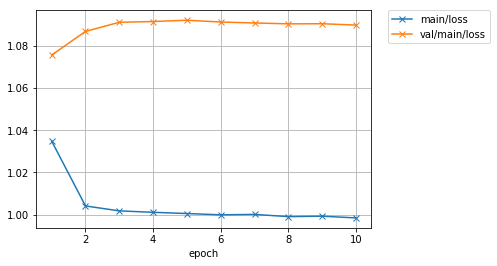

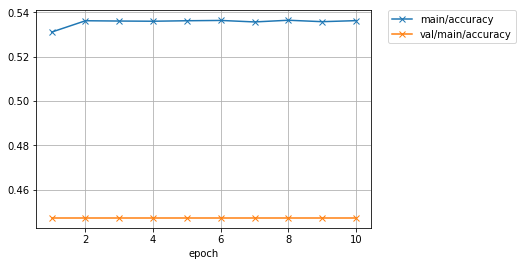

In [50]:
show_loss_and_accuracy()